In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# NLP
import contractions #need to install textserach as well
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

### Creating Virtual Env

`python -m venv name_of_vir_env`

Activate a vritual env

`. ~/name_of_vir_env/bin/actiavte` ==> ~ is used if it is created in home directory otherwise spesify a path

`source name_of_vir_env/bin/activate`

### Create requirements.txt for dependencies

`pip freeze > requirements.txt`

### to see the content of requirements

`cat requirements.txt`

### to edit the context of file

`vi requirements.txt`

to edit the version of packages you can use >= instead of == for example `pandas==1.21.1` yerine `pandas>=1.21.1` 

### Using Requirements.txt

`pip install -r requirements.txt`

### Doumentation of function

In [ ]:
def get_name('Serdar'):
    """
     Takes a name and returns a string
    >>> get_name('Serdar bozo')
    'Hello Brave Serdar Bozo'
    """

>>> get_name('Serdar bozo')
    'Hello Brave Serdar Bozo'
    
kismi dokumatasyon testi icin kullanilir

python -m pydoc -b 

bu kod ile browserda gorursum

### Getting information about class, package, method

In [171]:
Rank2D?
pd.DataFrame?

### Importing an image

In [ ]:
from IPython.display import Image
Image("crosstab_cheatsheet.png")

In [ ]:
# Jupyter "magic methods" -- only need to be run once per kernel restart
%load_ext autoreload
%aimport helpers, tests
%autoreload 1

### Changing a unique value with another value

In [305]:
a = {'col1':[1,1,1,4,2,2,3,7, "B"], 'col2':[9,4,4,4,5,5,6,8, "C"]}

df4 = pd.DataFrame(a)
df4

,col1,col2
0,1,9
1,1,4
2,1,4
3,4,4
4,2,5
5,2,5
6,3,6
7,7,8
8,B,C


In [320]:
list1 = []
for key, value in Counter(df4['col1']).items():
        if value == 1:
            list1.append(key)
print(list1)

[4, 3, 7, 'B']


In [329]:
from collections import Counter
columns = df4.columns.tolist()

for col in columns:
    for key, value in Counter(df4[col]).items():
        if value == 1:
            temp_index = df4[df4[col]==key].index.values.astype(int)[0]
            temp_index
            #print(temp_index)
            df4.loc[temp_index, col] = 'A'

3

6

7

8

0

6

7

8

In [330]:
df4

,col1,col2
0,1,A
1,1,4
2,1,4
3,A,4
4,2,5
5,2,5
6,A,A
7,A,A
8,A,A


### Checking a specific element in a df

In [327]:
df4['col1'].isin(['B'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
Name: col1, dtype: bool

### Assingning and using in a single line with ;

In [331]:
number = 8; print(number) 

8


### Setting Precision

In [335]:
1/3
from decimal import (Decimal, getcontext)
getcontext().prec=5 # We want 5 digits after in the precision
Decimal(1)/Decimal(3) # 

0.3333333333333333

Decimal('0.33333')

### Exponent

In [338]:
import math
math.pow(2,3)
2**3

8.0

8

### Type

In [343]:
number = 100
number_type = type(number)
number_type

int

### Round

In [350]:
too_many_decimals = 1.09238428368926492
round(too_many_decimals,2)
%timeit round(too_many_decimals,2) # fastest

1.09

372 ns ± 1.96 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [351]:
np.round(too_many_decimals, 2)
%timeit np.round(too_many_decimals, 2) # slower

1.09

7.67 µs ± 80 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [352]:
df5 = pd.DataFrame([too_many_decimals], columns=['A'], index=['first'])
df5.round(2)
%timeit df5.round(2) # slowest

,A
first,1.09


642 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### zip

In [354]:
a = [1,2,3,5]
b = ['ayse', 'fatma']

list(zip(a,b))

[(1, 'ayse'), (2, 'fatma')]

### set

In [359]:
a1 = set([1,2,3,4])
b1 = set([2,4,3,5])

unique_set = a1-b1
unique_set
unique_set = b1-a1
unique_set

{1}

{5}

In [383]:
import click

@click.command()
@click.option('--count', default=1, help='Number of greetings.')
@click.option('--name', prompt='Your name', help='The person to greet.')
def hello(count, name):
    """Simple program that greets NAME for a total of COUNT times."""
    
    for x in range(count):
        click.echo(f'Hello {name}!')



In [391]:
for x in range(2):
    click.echo(click.style('serdar', bg='blue', fg='white'))
    click.echo(f'Hello!')

serdar
Hello!
serdar
Hello!


### Lazy Evaluated Functions(Generators)

In [393]:
### To create infinite times choice from a list

def function1():
    import random
    
    capitals ={'Turkey':'Ankara', 'Spain':'Madrid',
              'England':'London', 'Greece':'Athena',
              'Canada':"Toronto", "Germany":"Berlin"}
    
    while True: # while dongusu bize sonsuz sayida sonuc uretmemize olanak sagliyor
        random_capital = random.choice(list(capitals.keys()))
        yield  # return one thing ata time so pretty memory efficient

In [394]:
capital = function1()

In [399]:
next(capital)

'Turkey'

### Dealing with Value Error

In [2]:
principal =-1

while principal < 0:
    try:
        principal = float(input("Enter principal amount "))
    except ValueError:
        print("Invalid Loan Amount")
        principal = -1 # This allows to get input unless it is invalid
print(f"Your principal is {principal}")

Enter principal amount ;f
Invalid Loan Amount
Enter principal amount we9ru
Invalid Loan Amount
Enter principal amount car
Invalid Loan Amount
Enter principal amount alkf\
Invalid Loan Amount
Enter principal amount 20
Your principal is 20.0


### Padding String

In [3]:
print('{a:<10}|{a:^10}|{a:>10}'.format(a='test'))
print('{a:~<10}|{a:~^10}|{a:~>10}'.format(a='test')) # first: left, middle:centers, last: right alignment
# a+padding will be 10

test      |   test   |      test
test~~~~~~|~~~test~~~|~~~~~~test


### Print out numbers in different formats

In [5]:
print("normal : {num:d}".format(num=33))
print("normal : {num:f}".format(num=33))
print("normal : {num:b}".format(num=33)) #binary
print("normal : {num:08b}".format(num=33))
print("normal : {num:0<4x}".format(num=33))

normal : 33
normal : 33.000000
normal : 100001
normal : 00100001
normal : 2100


### Decimals

In [17]:
print("${num:0.2f}".format(num=22/7)) # we're 0 padding here
print("${num:.2f}".format(num=22/7)) # we're 0 padding here, too
print("${num:8.2f}".format(num=22/7)) # 8 padding from left
print("${num:0.2e}".format(num=22/7)) # scientific notation
print("${num:0.1%}".format(num=22/7)) # % sign
print("${num:g}".format(num=5.1200000013)) # truncates insignificant part

$3.14
$3.14
$    3.14
$3.14e+00
$314.3%
$5.12


### Formating String

In [4]:
person ={"first":"Serdar", "last":"Bozoglan"}
print("{p[first]} {p[last]}".format(p=person))

Serdar Bozoglan


In [21]:
variable=27
print(f"{variable}") # f rachs local variables

27


## strings

In [23]:
s = 'serdar'
b = 'serdar ankara' 
print(list(s))
print(list(b))

['s', 'e', 'r', 'd', 'a', 'r']
['s', 'e', 'r', 'd', 'a', 'r', ' ', 'a', 'n', 'k', 'a', 'r', 'a']


In [25]:
name = 'serdar bozoglan'
first, last = name.split()
print(first)

serdar


### path

In [27]:
import os
print(os.environ['PATH'])
print(os.environ['PATH'].split(os.pathsep))

/Library/Frameworks/Python.framework/Versions/3.6/bin:/Users/serdar/anaconda3/bin:/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
['/Library/Frameworks/Python.framework/Versions/3.6/bin', '/Users/serdar/anaconda3/bin', '/anaconda3/condabin', '/usr/local/bin', '/usr/bin', '/bin', '/usr/sbin', '/sbin']


In [28]:
"banana and apple and cherry".split('and')

['banana ', ' apple ', ' cherry']

In [30]:
"apple, banana, cherry, muz, elma".split(",", 2)
# it splits from 2points and we get 3 elements

['apple', ' banana', ' cherry, muz, elma']

### right split

In [34]:
file_path = 'some/path/to/some_file.txt'
# we want extension
file_path.rsplit(".")[-1]

'txt'

In [39]:
#we want base name (some_file.txt)

file_path.rsplit("/", 1)[-1]

'some_file.txt'

In [42]:
# we want the directory
file_path.rsplit('/', 1)[0]

'some/path/to'

### joining strings

In [45]:
parts = "Apple and Banana".split('and')
print(parts)

"or".join(parts)

['Apple ', ' Banana']


'Apple or Banana'

In [46]:
## we cant join on int but need to cast

" ".join[1,2,3]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [48]:
" ".join([str(1),str(2),str(3)])

'1 2 3'

### isinstance()

In [52]:
print(name)
if isinstance(name, str):
    print(name.isprintable())
    print(name.isalnum())
    print(name[0].isdigit(),
          name[0].isspace(),
          name[0].islower(),
          name[0].isupper(),
          name[0].isalpha())


serdar bozoglan
True
False
False False True False True


### strip()

In [53]:
"\t\r a string \t\n\r".strip()

'a string'

In [55]:
"&! a string &&&!!!!".strip('&! ') # we strip &,! and space 

'a string'

In [56]:
"&! a string &&&!!!!".strip('&! ') == 'a string'

True

### string operations

In [59]:
print('a string'.upper())
print('a string'.title())
print('A STRING'.lower())
print('A sTRing'.swapcase())

A STRING
A String
a string
a StrING


In [60]:
"yes".startswith('y')

True

In [61]:
# checking extension
"some_file.exe".endswith('exe')

True

In [64]:
'ar' in "Serdar"

True

In [65]:
"Serdar".replace('ar', 'at')

'Serdat'

### printing && list comprehension

In [67]:
list2 = [letter for letter in "Hello World!"] # list comprehension
set2 = {letter for letter in "Hello World!"} # set comprehension
dict2 = {letter:i for i, letter in enumerate("Hello World!")} # dict comprehension

print("L2, S2, D2", list2, set2, dict2, sep='\n')

L2, S2, D2
['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', '!']
{'e', 'W', 'o', 'd', 'H', ' ', '!', 'r', 'l'}
{'H': 0, 'e': 1, 'l': 9, 'o': 7, ' ': 5, 'W': 6, 'r': 8, 'd': 10, '!': 11}


In [71]:
data = [[1,2], [3,4], [6,7], [9,8]]
new_list = []
for row in data:
    for value in row:
        new_list.append(value)

In [74]:
new_list

[1, 2, 3, 4, 6, 7, 9, 8]

In [73]:
flatten = [value for row in data for value in row] # onde sag taraftaki for u yapar
multi_dim = [[value for value in row] for row in data] # onde sag taraftaki for

print(flatten)
print(multi_dim)

[1, 2, 3, 4, 6, 7, 9, 8]
[[1, 2], [3, 4], [6, 7], [9, 8]]


### multiple operations on list comprehension

In [82]:
list3 = [(word.upper(), word, len(word)) for word in "the brown quick fox jumped over".split()]
print(list3)

[('THE', 'the', 3), ('BROWN', 'brown', 5), ('QUICK', 'quick', 5), ('FOX', 'fox', 3), ('JUMPED', 'jumped', 6), ('OVER', 'over', 4)]


### filter in list comprehesion

In [81]:
fizzes  = [x if x%3 else "fizz" for x in range(20)]
print(fizzes)

['fizz', 1, 2, 'fizz', 4, 5, 'fizz', 7, 8, 'fizz', 10, 11, 'fizz', 13, 14, 'fizz', 16, 17, 'fizz', 19]


### finding prime numbers

In [84]:
n = 100

non_primes = {j for i in range(2,8) for j in range(i*2,n,i)}
## Checking the element in a set takes the same time
## does not matter it has one time or one million items
print("non_primes :", non_primes)
print('--- ---- ---')
primes = [x for x in range(2, n) if x not in non_primes]
print("primes:", primes)

non_primes : {4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99}
--- ---- ---
primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


### Changing enumeration index from 0 to 1

In [69]:
dict2 = {letter:i for i, letter in enumerate("Hello World!", 1)}
dict2

{'H': 1, 'e': 2, 'l': 10, 'o': 8, ' ': 6, 'W': 7, 'r': 9, 'd': 11, '!': 12}

### Generator

In [85]:
import datetime

my_weeks = (datetime.datetime.now()+datetime.timedelta(days=7*i) for i in range(10))
# # 10 tane bugunde itibasen hafta uretmek icin kullanilir
## Eger bunu list comprehesion yapamk istersek () replace with [] 

In [86]:
for week in my_weeks:
    if input(f"select {week}?").lower().startswith('y'):
        print(f"SELECTED {week}!")
        break
else: ## else is used for "FOR" not for "IF"
    print("OK no date selected")

select 2019-08-03 15:29:30.817453?n
select 2019-08-10 15:29:32.795626?n
select 2019-08-17 15:29:33.211075?n
select 2019-08-24 15:29:33.591159?n
select 2019-08-31 15:29:33.898836?n
select 2019-09-07 15:29:34.178831?n
select 2019-09-14 15:29:34.482962?n
select 2019-09-21 15:29:34.755065?n
select 2019-09-28 15:29:35.034763?n
select 2019-10-05 15:29:35.322855?n
OK no date selected


### itertools count

In [87]:
import itertools
import random

for k in itertools.count():
    if all(random.randint(1,6) == 2 for _ in range(3)): # all returns if all variables are True
        break
print(f"Took {k} tries to get 3 2's")

# 3 kere 2 degeri alinca True olur if ancak o zaman break calisiyor

Took 78 tries to get 3 2's


### itertools cycle

In [90]:
for item in itertools.cycle(["Book", "Pencil", "Glass", "Watch"]):
    print(item)

Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glas

Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Penci

Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Wat

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glas

Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glas

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Penci

Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Wat

Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Penci

Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Penci

Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glas

Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Penci

Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Wat

Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Wat

Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Wat

Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glas

Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book
Pencil
Glass
Watch
Book

KeyboardInterrupt: 

### itertools combinations & permutations & product

In [92]:
print(list(itertools.combinations(['a', 'b', 'c', 'd'],2))) # order does not matter

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]


In [94]:
print(list(itertools.permutations("abcd",2))) # order matters so (a, b) does not equal to (b,a)

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'a'), ('b', 'c'), ('b', 'd'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('d', 'a'), ('d', 'b'), ('d', 'c')]


In [95]:
print(list(itertools.product("abc", "123")))

[('a', '1'), ('a', '2'), ('a', '3'), ('b', '1'), ('b', '2'), ('b', '3'), ('c', '1'), ('c', '2'), ('c', '3')]


### lambda func

In [97]:
number = (lambda x: x+1)(5)
number

6

### threading

In [96]:
import time
import threading

for delay, value in enumerate(['one', 'two', 'three'],1): #enumerate starts from 1 here
    threading.Timer(delay, lambda x=value:print(x)).start() # x value gets one, two, three respectively
time.sleep(4)

one
two
three


### partial function

In [100]:
import functools
def test(a,b,c,d):
    print(f"a ={a}, b={b}, c={c}, d={d}")
test(1,2,3,4)   
p = functools.partial(test, 2,3, d=22) # partially olarak degerleri atar, ilk deger a icin, 2. deger b ve d acikca belirtilmistir, 
p(65) # kalan deger c'ye atanir

a =1, b=2, c=3, d=4
a =2, b=3, c=65, d=22


In [ ]:
import sys

list_of_lists = []

for line in sys.stdin:
    print(line.readline())
    a = input()
    list_of_lists.append(a)

In [ ]:
def ab():
    list_of_lists = []

    for line in sys.stdin:
        print('hello')
        print(line.readline())
        a = line.readline()
        list_of_lists.append(a)
        return list_of_list

In [6]:
import sys

In [27]:
a = [[1,2,3], [5,6,7]]

In [30]:
new_list = []
list1 =[]
list2 =[]

In [34]:
a = int(input())
list1.append(a)

3


In [36]:
list1

[1, 3, 3]

In [40]:
b = int(input())
list2.append(b)

6


In [41]:
new_list = list1 +list2

In [42]:
sys.stdin = new_list

for line in sys.stdin:
    print(line)

1
3
3
2
4
6


In [22]:
n= int(input())

2


In [26]:
for _ in range(n):
    a, b = map(int, input().strip().split())
    #print(type(a))
    #b = map(int, input().strip().split())
    #print(type(b))
    print(a+b)

2 5
7
5 7
12


##### IGNORING WARNINGS

In [136]:
import warnings
warnings.filterwarnings('ignore')

### Running Jupyter Notebook without token 

In [ ]:
jupyter notebook --ip='*' --NotebookApp.token='' --NotebookApp.password=''

### we can see multiple statements at once

In [146]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
from IPython.core.display import HTML
HTML('<div class="alert alert-block alert-success">Your emission counts look good!</div>')

In [10]:
HTML('<div class="alert alert-block alert-success"><b>Your emission counts look good!</div></b>')

In [4]:
## with markdown

### <div class="alert alert-block alert-success">Your emission counts look good!

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
# to get rid of invalid chars we use ISA-8859-1

In [ ]:
df = pd.read_csv(url, error_bad_lines=False)
## get rid of bad lines

In [ ]:
## use .values for y
y = df['label'].values

### Reading File Names

In [ ]:
import pandas as pd
from pathlib import Path
import time

p = Path("./example_files")
all_files = []
for i in p.rglob('*.*'):
    all_files.append((i.name, i.parent, time.ctime(i.stat().st_ctime)))

columns = ["File_Name", "Parent", "Created"]
df = pd.DataFrame.from_records(all_files, columns=columns)

df.head()


In [115]:
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

In [117]:
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]
df = df_raw[df_raw.make.isin(models)].copy()

In [119]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


### query()

In [121]:
df.query('symboling==2 & make=="honda"') ## tirnak isaretlierine dikkat

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0


### prettypandas

In [133]:
import prettypandas as pp
mini_df = df.query('make=="honda" & bore==2.91')

In [134]:
mini_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0
35,0,110.0,honda,gas,std,four,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7295.0


In [137]:
mini_df.pipe(pp.PrettyPandas).style.background_gradient()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
31,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
32,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,150,64,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,150,64,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
34,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,150,64,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
35,0,110,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64,54.5,2010,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295


In [4]:
import pandas as pd
import prettypandas as pp

df = pd.DataFrame([[1,2,3], [4,5,6]], columns=['a','b','c'])

df.pipe(pp.PrettyPandas).as_currency('EUR', subset='b').total().average()

,a,b,c
0,1,€2.00,3
1,4,€5.00,6
Total,5,€7.00,9
Average,2.5,€3.50,4.5


### Selecting only numeric columns

In [165]:
df2 = pd.read_csv('./data/sample_data.csv')

In [166]:
df2.head()
df2.shape

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(249, 11)

### Get Numeric Columns Way1

In [167]:
numeric_df2 = df2._get_numeric_data()
numeric_df2.shape

(249, 7)

### Get Numeric Columns Way2

In [168]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df2 = df2.select_dtypes(include=numerics)
numeric_df2.shape

(249, 7)

### HeatMapping

In [169]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
5,6,1989.0,23.20,2.26,4.22,0.58,30.26
6,7,2006.0,11.38,9.23,6.50,2.90,30.01
7,8,2006.0,14.03,9.20,2.93,2.85,29.02
8,9,2009.0,14.59,7.06,4.70,2.26,28.62
9,10,1984.0,26.93,0.63,0.28,0.47,28.31


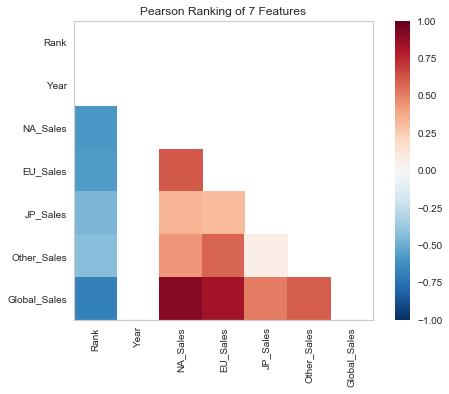

In [170]:
visualizer.fit_transform(numeric_df2)
visualizer.poof()

### FAST PANDAS OPERATION ==> SWIFTER

In [ ]:
def bikes_proportion(x, max_x):
    return x * 1.0 / max_x
data['bike_prop'] = data['bikes_available'].swifter.apply(
                    bikes_proportion,
                    max_x=np.max(data['bikes_available']))

In [ ]:
def processTweet(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

In [ ]:
from sklearn.feature_extraction import text 
my_additional_stop_word_list = ['no', 'not']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_word_list)

CV = CountVectorizer(ngram_range=(1,3), decode_error='ignore', stop_words='english')
cv_train = CV.fit_transform(X_train)
cv_test = CV.transform(X_test)

In [ ]:
# Write a function to perform the pre processing steps on the entire dataset
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# First lemmatize then stemming

In [ ]:
with open(os.path.join('data', 'sample_text.txt'), "r") as file:
    text = file.read()
    
## data folderin altindaki sample_text file'ini okur    

In [1]:
## Changing a directory of a jupyter notebook

import os
#os.chdir('/Users/serdar/desktop/datascience/26 ChatBot/Travelers') # New Path

In [16]:
# Version check

print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')

pandas:0.24.0
seaborn:0.9.0


### BINNING THE DATA

In [ ]:
bins = np.linspace(min(df['price']),(max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins, labels+group_names, include_lowest=True)               

### SIMPLE SCALING

In [ ]:
df['price'] = df['price']/max(df['price'])

### ONE-HOT ENCODING with get dummies

In [ ]:
pd.get_dummies(df['gas_type'], drop_first=True)

### REPLACING MISSING WITH MEAN

In [ ]:
avg=df['horsepower'].mean(axis=0)
df['horsepower'].replace(np.nan, avg)

In [113]:
slice=10
for i in range(slice):
    if i ==0:
        print(i*slice, (i+1)*slice)
    else:    
        print((i*slice)+1, (i+1)*slice)

0 10
11 20
21 30
31 40
41 50
51 60
61 70
71 80
81 90
91 100


### TO DataFrame

In [ ]:
df['drive-wheels'].value_counts().to_frame()

### Index Name

In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'

In [106]:
df = pd.DataFrame(np.random.rand(4,5))

In [107]:
df

,0,1,2,3,4
0,0.078332,0.981739,0.153749,0.536963,0.589724
1,0.380372,0.743687,0.162022,0.904419,0.457469
2,0.482465,0.155257,0.698137,0.667887,0.521467
3,0.559729,0.799665,0.109202,0.203445,0.176137


In [108]:
## Son sutuna kadar secme
df.iloc[:, :-1]

,0,1,2,3
0,0.078332,0.981739,0.153749,0.536963
1,0.380372,0.743687,0.162022,0.904419
2,0.482465,0.155257,0.698137,0.667887
3,0.559729,0.799665,0.109202,0.203445


In [109]:
## Son sutunuu secme
df.iloc[:,-1]

0    0.589724
1    0.457469
2    0.521467
3    0.176137
Name: 4, dtype: float64

In [90]:
def slicing_dataset(slice, df):
    dataset_list = []
    for i in range(slice):
        if i == 0:
            X_train = df.iloc[(i*slice):((i+1)*slice), :]
            dataset_list.append(X_train)
        else:
            X_train = df.iloc[((i*slice)+1):((i+1)*slice)]
            dataset_list.append(X_train)
    return dataset_list

### AUTOSAVE

In [32]:
## Autosave in every 30 seconds
%autosave 30 

Autosaving every 30 seconds


In [9]:
# Print formating
a = 'Ankara'
b = 'Istanbul' 
c = 'Izmir'
print (a, b)
print(f"{a} {b:.>{14}}")
print(f"{a:>{14}} {b:.>{14}}")
print('{:<12}{:<10}{:<10}'.format(a, b, c))

Ankara Istanbul
Ankara ......Istanbul
        Ankara ......Istanbul
Ankara      Istanbul  Izmir     


In [ ]:
# To upgrade all packages at the same time
# ! pip freeze — local | grep -v ‘^\-e’ | cut -d = -f 1 | xargs -n1 pip install -U

In [ ]:
!pip show rasa_nlu # check the version of a pacakge

In [14]:
import sys 
!{sys.executable} -m pip install sh

In [ ]:
from geopy import GoogleV3

place = "282 Main Street, Lodi, New Jersey"
location = GoogleV3().geocode(place)

In [ ]:
## FOR VISUALIZATION

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

In [ ]:
%config InlineBackend.figure_format ='retina'

# High REsoultion outputs

In [29]:
message = 'This is Serdar'
!echo message

message


In [30]:
!echo $message

This is Serdar


In [31]:
%autosave 30

Autosaving every 30 seconds


In [5]:
# Ask questions and get your answer
!howdoi replace in dataframe pandas

>>> df['BrandName'].replace(['ABC', 'AB'], 'A')
0    A
1    B
2    A
3    D
4    A


In [9]:
!howdoi **kwargs

>>> def print_keyword_args(**kwargs):
...     # kwargs is a dict of the keyword args passed to the function
...     for key, value in kwargs.iteritems():
...         print "%s = %s" % (key, value)
... 
>>> print_keyword_args(first_name="John", last_name="Doe")
first_name = John
last_name = Doe


In [21]:
import sh

sh.pwd()
sh.mkdir('Sample Files') # Create a folder
sh.touch('Sample_text.txt') # Create a file
sh.whoami() # print outs the user
sh.echo('hello world')

hello world

In [12]:
import requests
import pprint

url = 'https://randomuser.me/api/?results=1'
users = requests.get(url).json()

In [11]:
print(users)

{'results': [{'gender': 'female', 'name': {'title': 'ms', 'first': 'leah', 'last': 'carlson'}, 'location': {'street': '5864 bollinger rd', 'city': 'port macquarie', 'state': 'western australia', 'postcode': 920, 'coordinates': {'latitude': '-86.1325', 'longitude': '6.5569'}, 'timezone': {'offset': '+10:00', 'description': 'Eastern Australia, Guam, Vladivostok'}}, 'email': 'leah.carlson@example.com', 'login': {'uuid': '81df30be-2b8c-49fb-b715-1a7126f44e93', 'username': 'greenbutterfly680', 'password': 'adrian', 'salt': 'UIVL0S7C', 'md5': '7b348ff863dc60482385e6d7406c23d3', 'sha1': '1f220d6f3d1ee4c7eb2551a3b96c576010d72718', 'sha256': '03b33b347559074424c8c918e5dc8ef93f243062e3fc5c65572295a9abec8f52'}, 'dob': {'date': '1969-05-16T20:10:33Z', 'age': 49}, 'registered': {'date': '2003-11-10T02:00:58Z', 'age': 15}, 'phone': '03-9228-5202', 'cell': '0416-475-589', 'id': {'name': 'TFN', 'value': '847384723'}, 'picture': {'large': 'https://randomuser.me/api/portraits/women/17.jpg', 'medium': 'h

In [13]:
pprint.pprint(users)

{'info': {'page': 1,
          'results': 1,
          'seed': 'b32db8e5b914b955',
          'version': '1.2'},
 'results': [{'cell': '0473-791-896',
              'dob': {'age': 68, 'date': '1950-10-01T18:27:18Z'},
              'email': 'carolyn.nichols@example.com',
              'gender': 'female',
              'id': {'name': 'TFN', 'value': '909885589'},
              'location': {'city': 'mildura',
                           'coordinates': {'latitude': '-84.9902',
                                           'longitude': '98.7994'},
                           'postcode': 9775,
                           'state': 'new south wales',
                           'street': '4065 ranchview dr',
                           'timezone': {'description': 'Kabul',
                                        'offset': '+4:30'}},
              'login': {'md5': '59a0db4861c1a3167322ede5d3c08728',
                        'password': 'weiner',
                        'salt': 'COxCyQyp',
                

In [ ]:
!/usr/bin/env python

Python 3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:14:23) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 

In [3]:
%xmode Plain
%pdb on

# Other modes of xmode Verbose , Context
# %pdb debugger runs after exception

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [ ]:
## %timeit line-magic and %%timeit cell-magic

In [2]:
%history -n 1-4

   1:
import sys 
!{sys.executable} -m pip install memory_profiler
   2: %history -n 1-4


In [ ]:
# OPTIONS

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.max_colwidth', -1) # Shows column without truncation

In [ ]:
## READING FILE WITH SKIPPING AND ONLY READ 200 ROWS 

In [ ]:
df =pd.read_csv('reviews_data.txt.gz', skiprows=10000, nrows=200, error_bad_lines=False)

In [ ]:
#FOR SEABORN

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_context('notebook') # maybe poster
# sns.set_context('poster', font_scale=0.8) 

In [ ]:
flatui = ["#9b59b6", "#3498db"] # guzel renkler
g = sns.PairGrid(df, vars=['age', 'test', 'bid', 'win', 'conversion'],
                 hue='gender', palette=flatui)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='bid', hue='gender', data=df, palette=flatui) #palette='Set_1'


## MISSING VALUES TABLE

In [18]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## READING A FILE

In [ ]:
with open('whoops.txt', 'r') as mynewfile:
    myvariable = mynewfile.readlines()
    
## This context manager automatically close the file 

In [ ]:
## READING WITH CHUNKSIZE

In [ ]:
csv_url='http://bit.ly/2cLzoxH''
# use chunk size 500
c_size = 500
for gm_chunk in pd.read_csv(csv_url,chunksize=c_size):
    print(gm_chunk.shape)

In [ ]:
# FROM STR TO DATETIME

a = datetime.datetime.strptime(df['Date'][0], "%b %d %Y").date()

In [32]:
## CURRENT DIRECTORY

import os
cwd = os.getcwd()
cwd

'/Users/serdarbozoglan/Desktop/DataScience'

In [ ]:

# FROM PDF TO TXT

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

lone=convert_pdf_to_txt('doc_3Trademark_Transfer_Agreement.pdf')


f=open('xxx.txt','w')
f.write(lone)
f.close()



with open('xxx.txt') as f:
    clean_cont = f.read().splitlines()


In [ ]:
# Advanced CSV loading example
data = pd.read_csv(
        "data/files/complex_data_example.tsv",      # relative python path to subdirectory
        sep='\t'           # Tab-separated value file.
        quotechar="'",        # single quote allowed as quote character
        dtype={"salary": int},             # Parse the salary column as an integer 
        usecols=['name', 'birth_date', 'salary'].   # Only load the three columns specified.
        parse_dates=['birth_date'],     # Intepret the birth_date column as a date
        skiprows=10,         # Skip the first 10 rows of the file
        na_values=['.', '??']       # Take any '.' or '??' values as NA
)

In [ ]:
N = len(y_test)
np.sum(y_pred == y_test)/N

In [1]:
# Figure size ve xticks/yticks boyutu
plt.rcParams['figure.figsize'] = (10,8)
plt.tick_params(labelsize=15)


plt.rcParams['figure.figsize'] =(8,6)
params = {'xticks.font': 16,}
flatui = ["#9b59b6", "#3498db"]

sns.countplot(x ='y', data=df,palette=flatui)
plt.xticks(fontsize=17), plt.yticks(fontsize=17)
plt.xlabel('Target', fontsize=17), plt.ylabel('Count', fontsize=17)
plt.legend(loc='upper right', borderpad=-2)
sns.despine()

In [ ]:
with open('bank.csv', 'r') as file: ## Reads file at once
    print(file.read())

In [ ]:
from itertools import islice # Partial reading from the dataset
with open("bank-full.csv") as myfile:
    head = list(islice(myfile, 5))
print (head)

In [ ]:
def get_dummies(dataset):
    for var in categorical:
        categorical_list = "var"+"_"+var 
        categorical_list = pd.get_dummies(dataset[var], prefix = var,)
        temp_df = dataset.join(categorical_list)
        dataset = temp_df
    
    temp_df_cat_cols = dataset.columns.values.tolist()
    kept_columns = [col for col in temp_df_cat_cols if col not in categorical]
    dataset = dataset[kept_columns]
    return dataset

In [ ]:
plt.subplot(1,2,1)
plt.plot(x,y, 'r')

plt.subplot(1,2,2)
plt.plot(y,x, 'b')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x,y, 'r');
axes[0].set_title('FIRST PLOT')

axes[1].plot(y,x, 'g')
axes[1].set_title('SECOND PLOT')

plt.tight_layout()

In [ ]:
import qgrid
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget
df1 = qgrid_widget.get_changed_df()